# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [148]:
# Importing the file porter_data_1.csv
porterdf = pd.read_csv('C:/Users/Sonali/Desktop/PandaCSV/Machine Learning/Delivery_Starter/porter_data_1.csv')
porterdf.head()
porterdf.shape # (rows - 175777, columns - 14) 

(175777, 14)

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [5]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
porterdf['created_at'] = pd.to_datetime(porterdf['created_at'])
porterdf['actual_delivery_time'] = pd.to_datetime(porterdf['actual_delivery_time'])
porterdf.info() # all are non-null, datatype for actual_delivery_time,created_at  should be date


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [7]:
# Convert categorical features to category type
porterdf['store_primary_category'] = porterdf['store_primary_category'].astype('category')
porterdf['order_protocol'] = porterdf['order_protocol'].astype('category')
porterdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [9]:
# Calculate time taken in minutes
porterdf['delivery_duration'] = (porterdf['actual_delivery_time'] - porterdf['created_at']).dt.total_seconds() / 60
porterdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [11]:
# Extract the hour and day of week from the 'created_at' timestamp
porterdf['order_hour'] = porterdf['created_at'].dt.hour            # Hour of the day (0–23)
porterdf['order_dayofweek'] = porterdf['created_at'].dt.dayofweek  # Day of the week (0=Monday, 6=Sunday)

# Create a categorical feature 'isWeekend'
#change type of isweekend as categorical
porterdf['isWeekend'] = porterdf['order_dayofweek'].apply(lambda x: 1 if x> 4 else 0).astype('category')
print(porterdf['order_dayofweek'],porterdf['isWeekend'])


0         4
1         1
2         0
3         3
4         1
         ..
175772    1
175773    4
175774    5
175775    6
175776    6
Name: order_dayofweek, Length: 175777, dtype: int32 0         0
1         0
2         0
3         0
4         0
         ..
175772    0
175773    0
175774    1
175775    1
175776    1
Name: isWeekend, Length: 175777, dtype: category
Categories (2, int64): [0, 1]


In [13]:
# Drop unnecessary columns
# order protocol The integer code indicating how the order was placed (e.g., viaPorter or call to restaurant
# total_items The total number of items in the order. delivery time prediction is irrespective of no of items
# The number of distinct items in the order. num_distinct_items
# min_item_price The price of the cheapest item in the order.
# max_item_price
#total_onshift_dashers
# All these are irrelevant for predicting delivery time
porterdf.drop(columns=['store_primary_category','order_protocol', 'total_items', 'num_distinct_items','min_item_price','max_item_price','total_onshift_dashers','total_busy_dashers','total_outstanding_orders'], inplace=True)
porterdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   market_id             175777 non-null  float64       
 1   created_at            175777 non-null  datetime64[ns]
 2   actual_delivery_time  175777 non-null  datetime64[ns]
 3   subtotal              175777 non-null  int64         
 4   distance              175777 non-null  float64       
 5   delivery_duration     175777 non-null  float64       
 6   order_hour            175777 non-null  int32         
 7   order_dayofweek       175777 non-null  int32         
 8   isWeekend             175777 non-null  category      
dtypes: category(1), datetime64[ns](2), float64(3), int32(2), int64(1)
memory usage: 9.6 MB


#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [15]:
# Define target variable (y) and features (X)
# Target Variable (y): variable trying to  predict is delivery_duration     
# features (X): These are the input variables that are used to predict the target variable.
# delivery_duration is predicted by market_id, subtotal, distance, order_hour, order_dayofweek, and isWeekend.
y = porterdf['delivery_duration']
# dropping the target and any non-numeric or identifier columns)
X = porterdf.drop(columns=['delivery_duration', 'actual_delivery_time', 'created_at'])

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [17]:
# Split data into training and testing sets
# Split into 70% training and 30% testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70,test_size=0.30,random_state=100)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [21]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols   = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['category', 'object', 'bool']).columns.tolist()

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

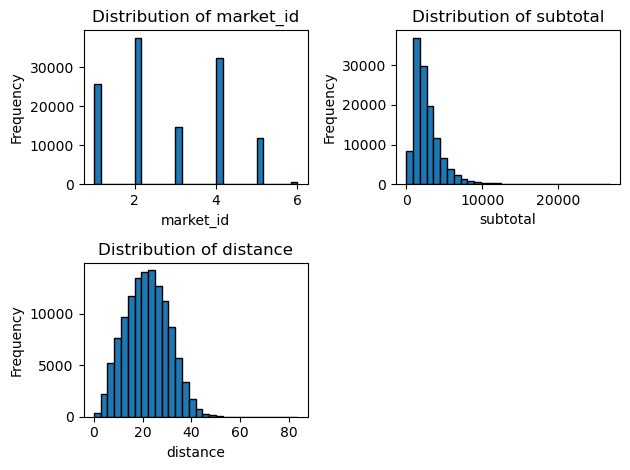

In [23]:
# Plot distributions for all numerical columns
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) + 1) // 2, 2, i)
    plt.hist(X_train[col], bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
# Display the histograms
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

C:\Users\Sonali\AppData\Local\Temp\ipykernel_47296\3814143165.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_train, x=col, palette="Set2")


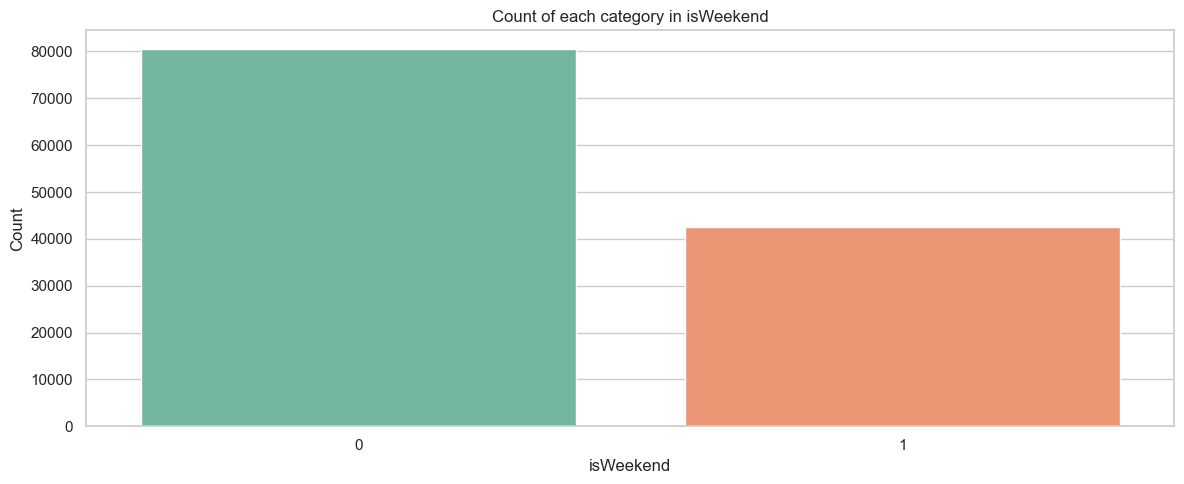

In [25]:
# Distribution of categorical columns
# Set up plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5 * len(categorical_cols)))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    sns.countplot(data=X_train, x=col, palette="Set2")
    plt.title(f'Count of each category in {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
# Display the histograms
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

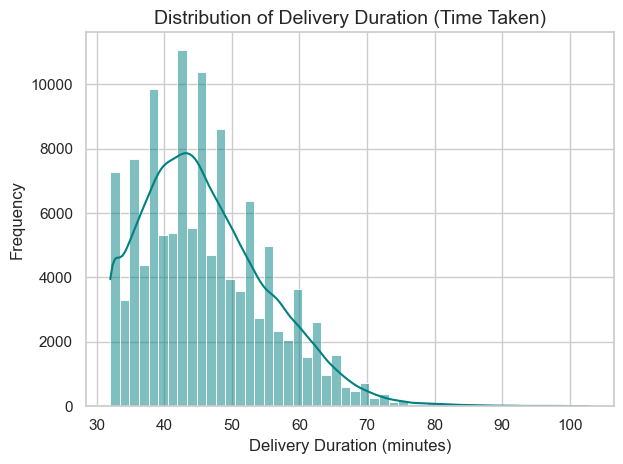

In [33]:
# Distribution of time_taken
# Set plot style
traindf = pd.concat([X_train, y_train], axis=1)
sns.histplot(data=traindf, x='delivery_duration', bins=50, kde=True, color='teal')
plt.title('Distribution of Delivery Duration (Time Taken)', fontsize=14)
plt.xlabel('Delivery Duration (minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

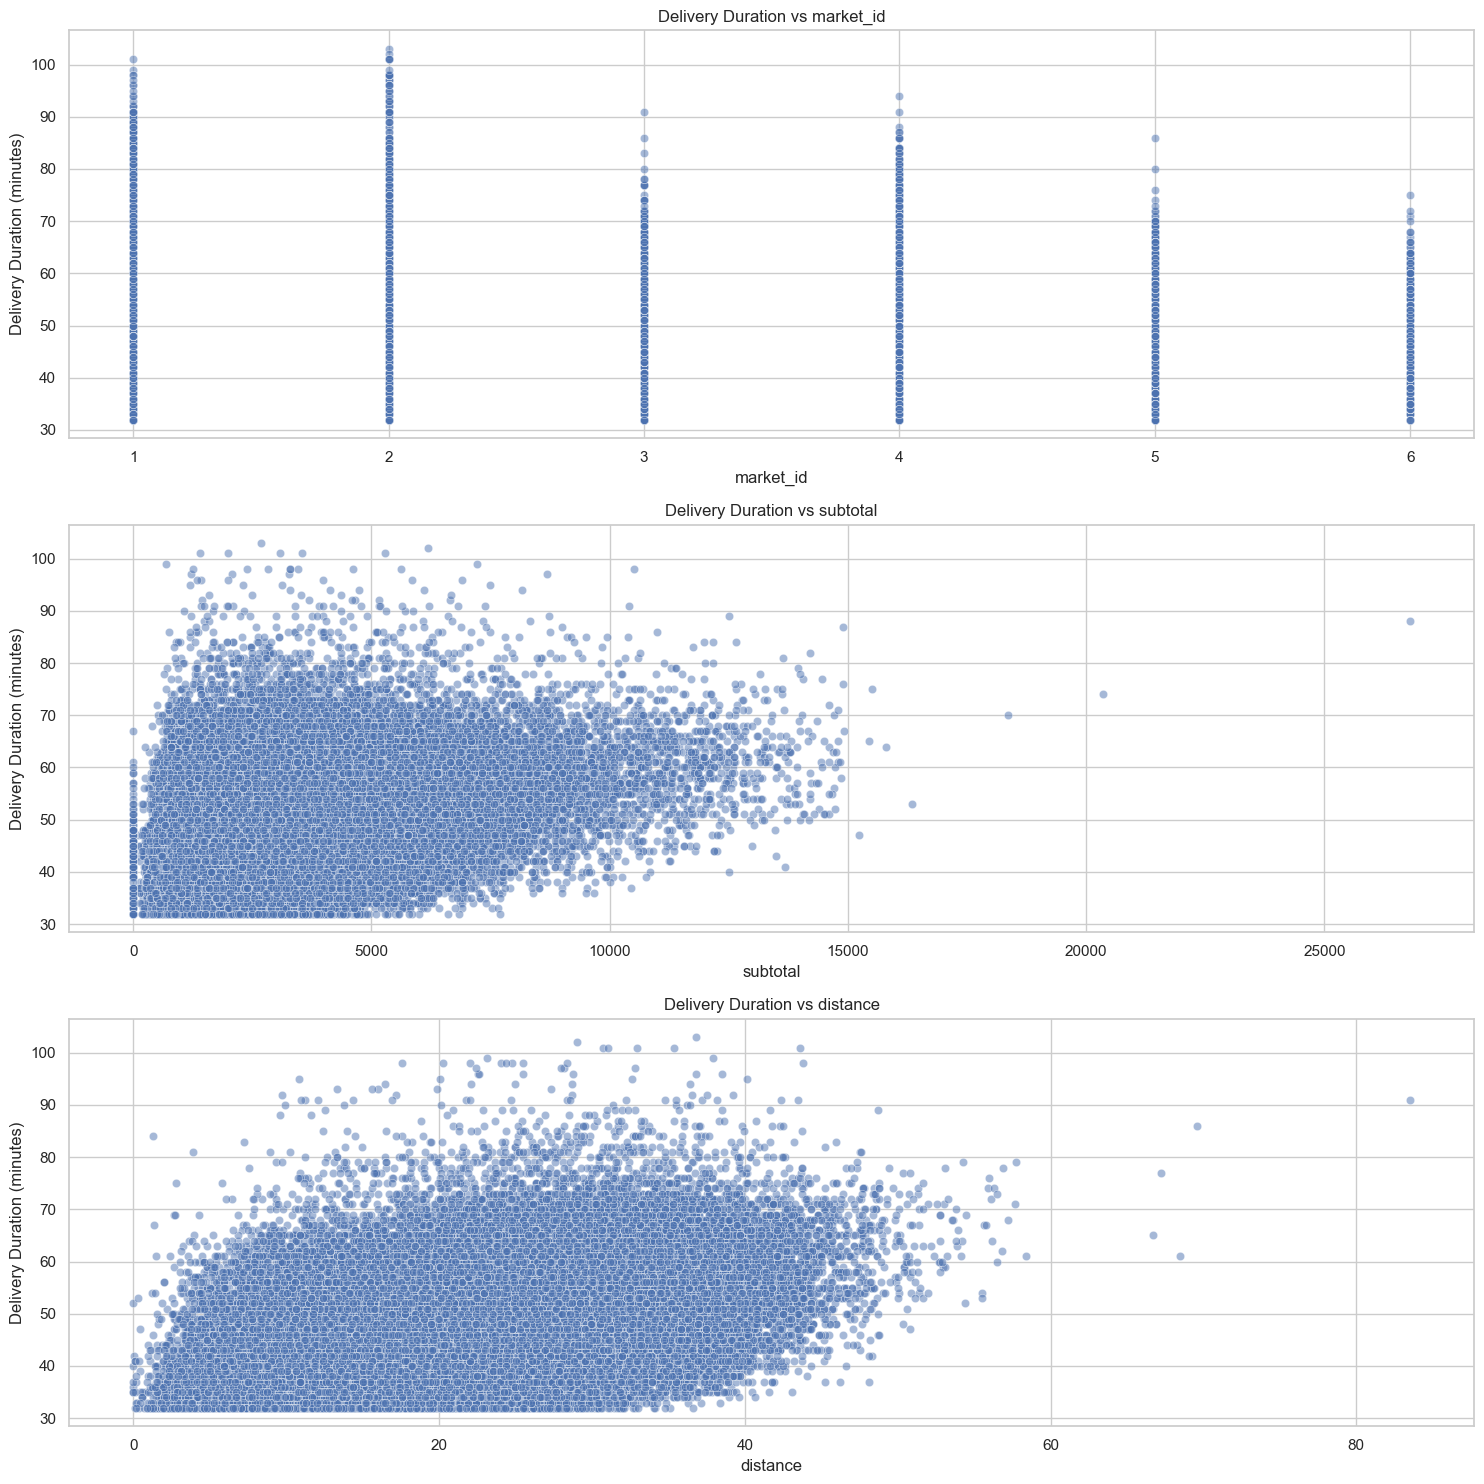

In [35]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=(15, 5 * len(numerical_cols)))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.scatterplot(data=traindf, x=col, y='delivery_duration', alpha=0.5)
    plt.title(f'Delivery Duration vs {col}')
    plt.xlabel(col)
    plt.ylabel('Delivery Duration (minutes)')
    plt.tight_layout()

plt.show()


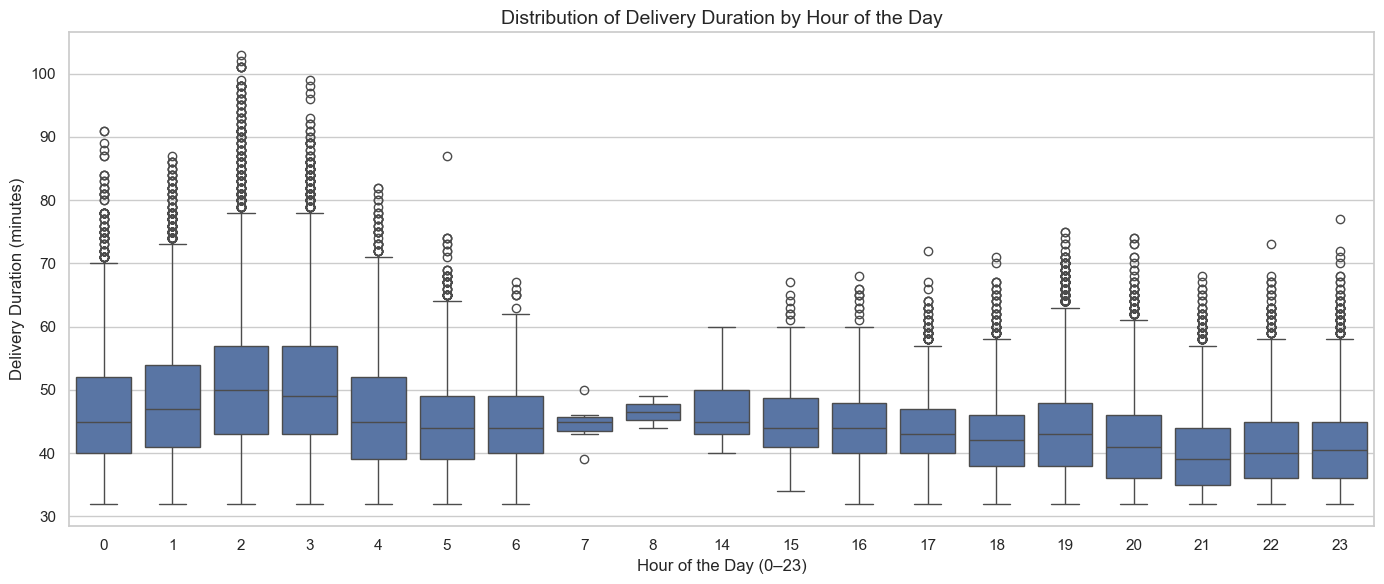

In [37]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(14, 6))
sns.boxplot(data=traindf, x='order_hour', y='delivery_duration')
plt.title('Distribution of Delivery Duration by Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day (0–23)')
plt.ylabel('Delivery Duration (minutes)')
plt.tight_layout()
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

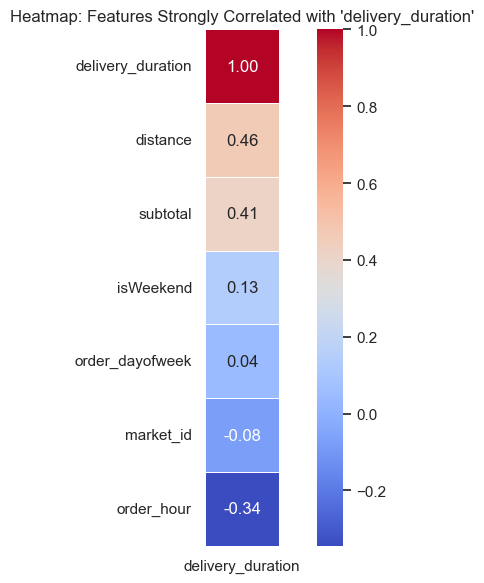

In [53]:
# Plot the heatmap of the correlation matrix
correlation_with_target = traindf.corr()[['delivery_duration']]\
                         .sort_values(by='delivery_duration', ascending=False)

# Step 4: Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_target, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)

plt.title("Heatmap: Features Strongly Correlated with 'delivery_duration'")
plt.tight_layout()
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [55]:
# Drop 3-5 weakly correlated columns from training dataset
#we can drop market id,order_hour,order_dayofweek,isWeekend as it shows value near to 0 no linear relationship
# Define the weakly correlated features manually
weak_features = ['market_id', 'order_hour', 'order_dayofweek', 'isWeekend']

# Drop from training and test datasets
X_train.drop(columns=weak_features, inplace=True, errors='ignore')
X_test.drop(columns=weak_features, inplace=True, errors='ignore')


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

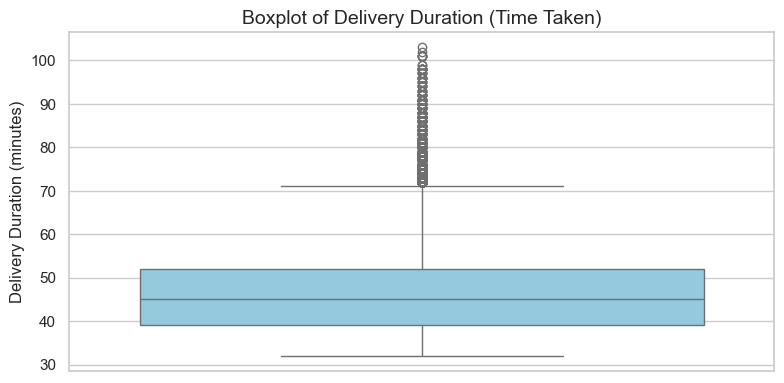

In [59]:
# Boxplot for time_taken
plt.figure(figsize=(8, 4))
sns.boxplot(y=y_train, color='skyblue')

plt.title("Boxplot of Delivery Duration (Time Taken)", fontsize=14)
plt.ylabel("Delivery Duration (minutes)")
plt.tight_layout()
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [61]:
# Handle outliers
numerical_cols_list = traindf.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in numerical_cols_list:
    Q1 = traindf[col].quantile(0.25)
    Q3 = traindf[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    traindf = traindf[(traindf[col] >= lower_bound) & (traindf[col] <= upper_bound)]

# After outlier removal, split features and target again
X_train_cleaned = traindf.drop(columns=['delivery_duration'])
y_train_cleaned = traindf['delivery_duration']

# Optional: Check new shape
print("X_train_cleaned shape:", X_train_cleaned.shape)

X_train_cleaned shape: (115709, 6)


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [68]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols_test = X_test.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define categorical columns
categorical_cols_test = X_test.select_dtypes(include=['category', 'object', 'bool']).columns.tolist()


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

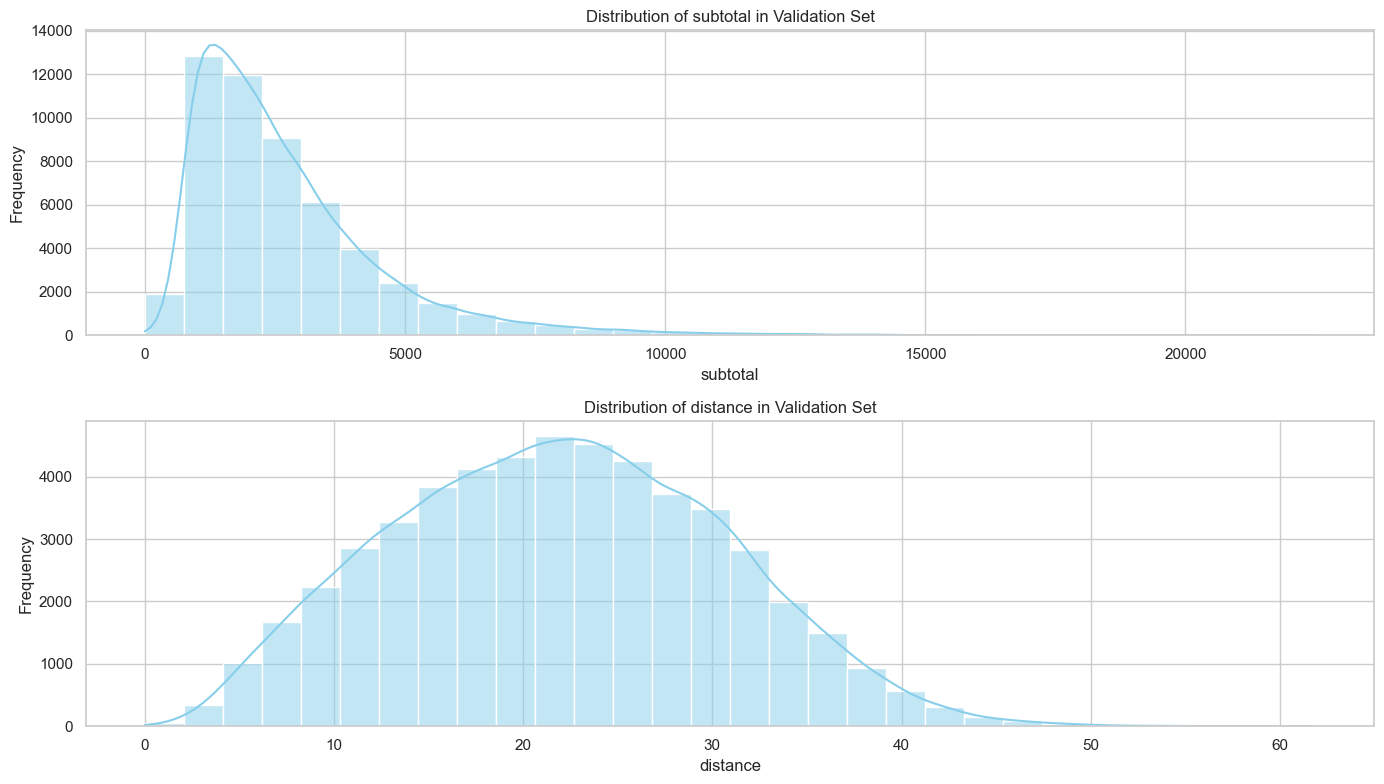

In [70]:
# Plot distributions for all numerical columns
# Plot distributions
plt.figure(figsize=(14, 4 * len(numerical_cols_test)))

for i, col in enumerate(numerical_cols_test, 1):
    plt.subplot(len(numerical_cols_test), 1, i)
    sns.histplot(X_test[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col} in Validation Set')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()


##### **4.1.2**
Check the distribution of categorical features

In [74]:
# Distribution of categorical columns
# Set up plotting area
plt.figure(figsize=(12, 5 * len(categorical_cols_test)))
if categorical_cols_test:
    plt.figure(figsize=(12, 5 * len(categorical_cols_test)))
    for i, col in enumerate(categorical_cols_test, 1):
        plt.subplot(len(categorical_cols_test), 1, i)
        sns.countplot(data=X_test, x=col, palette='Set2')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.tight_layout()
    plt.show()
else:
    print("No categorical columns found in test data.")

No categorical columns found in test data.


<Figure size 1200x0 with 0 Axes>

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

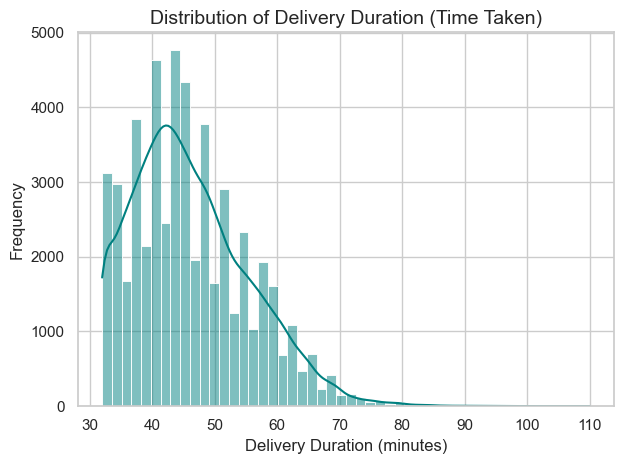

In [76]:
# Distribution of time_taken
# Set plot style
testdf = pd.concat([X_test, y_test], axis=1)
sns.histplot(data=testdf, x='delivery_duration', bins=50, kde=True, color='teal')
plt.title('Distribution of Delivery Duration (Time Taken)', fontsize=14)
plt.xlabel('Delivery Duration (minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

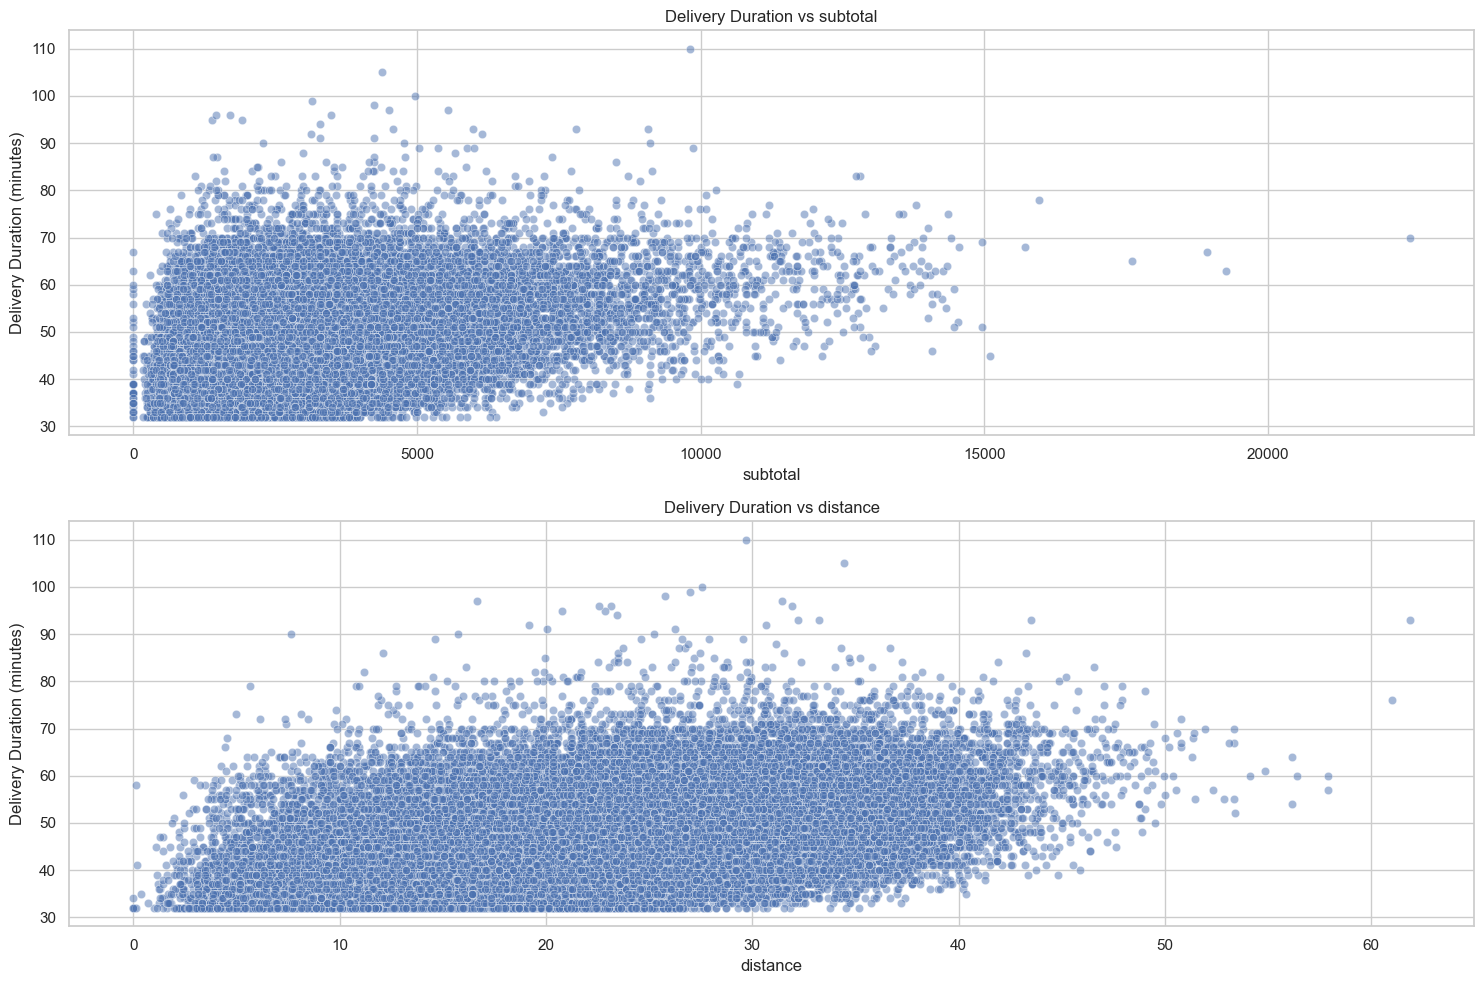

In [80]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=(15, 5 * len(numerical_cols_test)))

for i, col in enumerate(numerical_cols_test, 1):
    plt.subplot(len(numerical_cols_test), 1, i)
    sns.scatterplot(data=testdf, x=col, y='delivery_duration', alpha=0.5)
    plt.title(f'Delivery Duration vs {col}')
    plt.xlabel(col)
    plt.ylabel('Delivery Duration (minutes)')
    plt.tight_layout()

plt.show()


#### **4.3** Drop the columns with weak correlations with the target variable

In [94]:
# Drop the weakly correlated columns from training dataset


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [98]:
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [104]:
# Apply scaling to the numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 2: Initialize scaler
scaler = StandardScaler()

# Step 3: Fit the scaler on training data and transform both train and test
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [106]:
# Create/Initialise the model
# Initialize and train the model
model = LinearRegression()


In [112]:
# Train the model using the training data
model.fit(X_train_scaled, y_train)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 46.192656225872256
Coefficients: [3.71011389 4.16270964]


In [121]:
# Make predictions
y_pred = model.predict(X_test_scaled)
print("First 5 predicted delivery durations:", y_pred[:5])

First 5 predicted delivery durations: [42.74580197 42.43410327 41.16278958 45.39409429 45.58011788]


In [126]:
# Find results for evaluation metrics

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display results
print(f"R² Score  : {r2:.3f}")
print(f"MAE       : {mae:.2f} minutes")
print(f"RMSE      : {rmse:.2f} minutes")


R² Score  : 0.367
MAE       : 5.68 minutes
RMSE      : 7.41 minutes


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

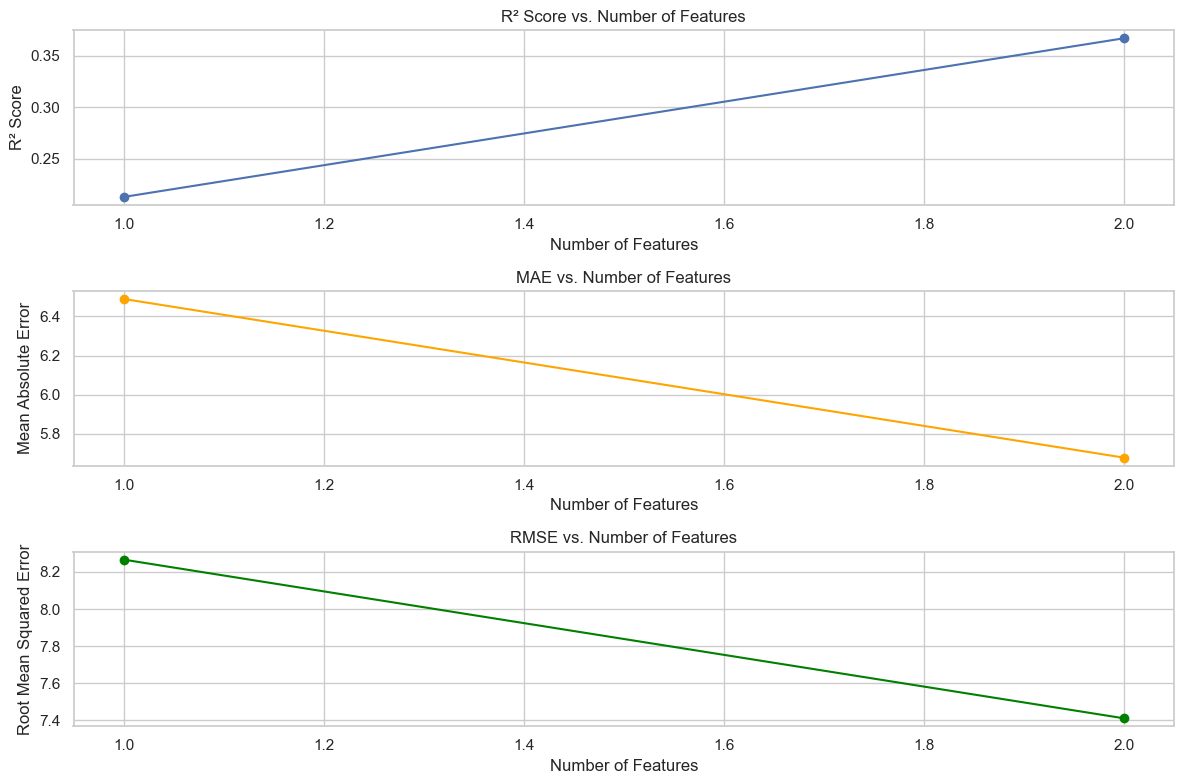

In [130]:
# Loop through the number of features and test the model
correlations = X_train_scaled.corrwith(y_train).abs().sort_values(ascending=False)
r2_scores = []
mae_scores = []
rmse_scores = []
feature_counts = []
for n in range(1, len(correlations) + 1):
    selected_features = correlations.index[:n]
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train_scaled[selected_features], y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_scaled[selected_features])
    
    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Store the results
    r2_scores.append(r2)
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    feature_counts.append(n)

# Step 3: Plot the evaluation metrics
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(feature_counts, r2_scores, marker='o')
plt.title('R² Score vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('R² Score')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(feature_counts, mae_scores, marker='o', color='orange')
plt.title('MAE vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Mean Absolute Error')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(feature_counts, rmse_scores, marker='o', color='green')
plt.title('RMSE vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Root Mean Squared Error')
plt.grid(True)

plt.tight_layout()
plt.show()


In [132]:
# Build the final model with selected number of features

# Suppose top 3 features based on correlation with target are selected:
top_n = 3
selected_features = correlations.index[:top_n].tolist()

# Train the final model
final_model = LinearRegression()
final_model.fit(X_train_scaled[selected_features], y_train)

# Predict
final_predictions = final_model.predict(X_test_scaled[selected_features])

# Evaluate
r2 = r2_score(y_test, final_predictions)
mae = mean_absolute_error(y_test, final_predictions)
rmse = np.sqrt(mean_squared_error(y_test, final_predictions))

# Display results
print("Final Model Evaluation (Top", top_n, "features):")
print(f"R² Score  : {r2:.3f}")
print(f"MAE       : {mae:.2f} minutes")
print(f"RMSE      : {rmse:.2f} minutes")


Final Model Evaluation (Top 3 features):
R² Score  : 0.367
MAE       : 5.68 minutes
RMSE      : 7.41 minutes


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

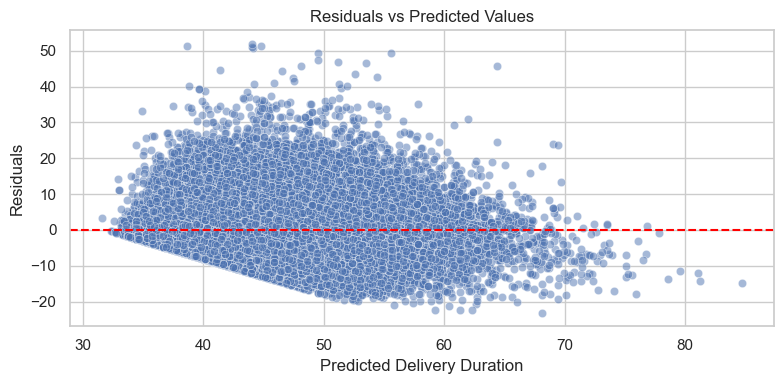

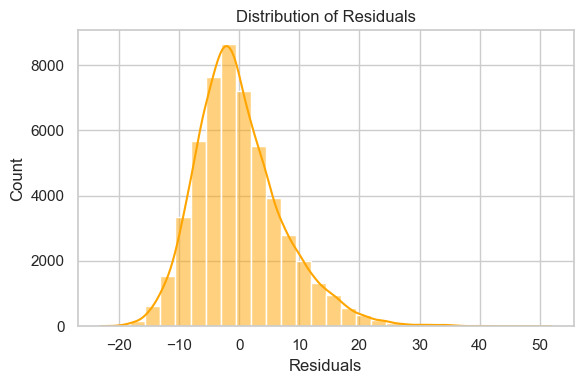

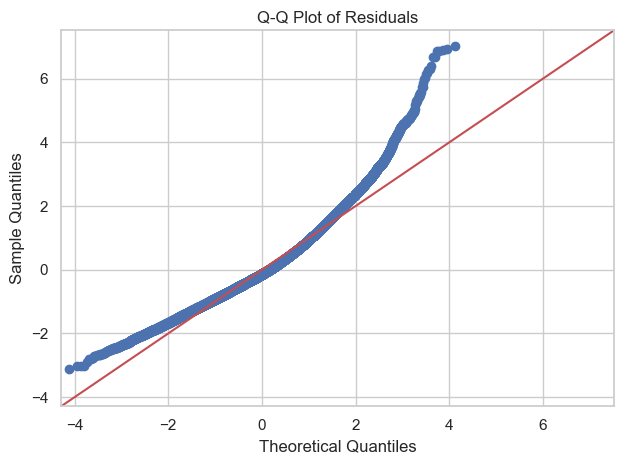

In [134]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
# Step 1: Calculate residuals
residuals = y_test - final_predictions

# Step 2: Residuals vs Predicted plot
plt.figure(figsize=(8, 4))
sns.scatterplot(x=final_predictions, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Delivery Duration')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

# Step 3: Histogram of residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30, color='orange')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.tight_layout()
plt.show()

# Step 4: Q-Q plot (for checking normality of residuals)
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.tight_layout()
plt.show()


[Your inferences here:]
For first image:
Cone pattern for residual plot infer that as predicted value increase residual spread increase
Heteroscedasticity increases with prediction size. Also linear model is not fully capturing the pattern in the data.
For second image :
Distribution is right skewed and errors are not centered around 0
For thrid image :
Heavy curve on the top right confirms not normal distribution of residuals

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [136]:
# Compare the scaled vs unscaled features used in the final model
# Select top N features used in the final model
top_n = 3
selected_features = correlations.index[:top_n].tolist()

# ---------- Unscaled Model ----------
model_unscaled = LinearRegression()
model_unscaled.fit(X_train[selected_features], y_train)
y_pred_unscaled = model_unscaled.predict(X_test[selected_features])

# ---------- Scaled Model ----------
# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = X_train[selected_features].copy()
X_test_scaled = X_test[selected_features].copy()

X_train_scaled[selected_features] = scaler.fit_transform(X_train_scaled)
X_test_scaled[selected_features] = scaler.transform(X_test_scaled)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)

# ---------- Compare Performance ----------
def evaluate(y_true, y_pred):
    return {
        "R² Score": round(r2_score(y_true, y_pred), 3),
        "MAE": round(mean_absolute_error(y_true, y_pred), 2),
        "RMSE": round(np.sqrt(mean_squared_error(y_true, y_pred)), 2)
    }

results = pd.DataFrame({
    "Unscaled": evaluate(y_test, y_pred_unscaled),
    "Scaled": evaluate(y_test, y_pred_scaled)
})

print("📊 Performance Comparison (Scaled vs Unscaled):")
print(results)


📊 Performance Comparison (Scaled vs Unscaled):
          Unscaled  Scaled
R² Score     0.367   0.367
MAE          5.680   5.680
RMSE         7.410   7.410


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [152]:
# Analyze the effect of a unit change in a feature, say 'total_items'
if 'total_items' not in X.columns:
  X['total_items'] = porterdf['total_items']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   market_id        175777 non-null  float64 
 1   subtotal         175777 non-null  int64   
 2   distance         175777 non-null  float64 
 3   order_hour       175777 non-null  int32   
 4   order_dayofweek  175777 non-null  int32   
 5   isWeekend        175777 non-null  category
 6   total_items      175777 non-null  int64   
dtypes: category(1), float64(2), int32(2), int64(2)
memory usage: 6.9 MB


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Yes our data has some categorical variables. order_dayofweek,isWeekend etc.We need to further analyze their effect on dependent variables.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>Test_size=0.2 means 20% of the data is for testing,and 80% is for training.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>As per Heatmap distance has the highest correlation with target variable.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>To detect outliers, I used combination of visualization and statistical methods(IQR eg).



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>Distance Between Restaurant and Customer
>Order Preparation Time
>Time of Day (Order Hour)



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>LR is statistical technique to predict dependent variable based on independent variable. 
Steps involved are:
>It involves states as in :  Modeling the Relationship(as one variable increases other variable increases with constant rate), Finding the Best-Fit Line, minimize the difference between the predicted values (from the equation) and the actual values,  interpreting the Results linear equation can be used to predict the value of the dependent variable.
>example Predicting sales based on advertising spending, Forecasting stock prices based on economic indicators etc



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>In simple linear regression it examines the relationship between one independent variable and one dependent variable, while in case of multiple linear regression it analyzes the relationship between one dependent variable and two or more independent variables.

##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>Cost function quantifies the difference between predicted and actual values.It minimized using optimization algorithms like gradient descent to find the best model parameters that minimize the error.



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**
Overfitting occurs when a model learns the training data too well leading to high accuracy on the training set but poor accuracy on new, unseen data. Underfitting, on the other hand, occurs when a model is too simple to capture the underlying patterns in the data, resulting in poor performance on both training and new data. 
>



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual plot helps in identifying difference between observed and predicted values.It helps in identifying non-linearity, checking constant variance, detecting outliers, assessing independence of residuals, evaluates model fit.